In [1]:
import warnings
import itertools
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_csv('data/superstore.csv') 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         10800 non-null  object 
 1   Order ID       10800 non-null  object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9983 non-null   float64
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quanti

In [4]:
# Let's try to change the datatypes of the following column in the dataset.
df['Order Date'] = df['Order Date'].astype('datetime64[ns]')
df['Ship Date'] = df['Ship Date'].astype('datetime64[ns]')
df['Postal Code'] = df['Postal Code'].astype('object')
df['Sales'] = df['Sales'].astype('float64')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         10800 non-null  object        
 1   Order ID       10800 non-null  object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9983 non-null   object        
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994

In [6]:
furniture = df.loc[df['Category'] == 'Furniture']

In [7]:
furniture

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
5,6,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0,0.00,14.1694
10,11,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9.0,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,9963,CA-2016-168088,2016-03-19,2016-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4.0,0.32,-67.6704
9964,9965,CA-2017-146374,2017-12-05,2017-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1.0,0.00,6.4320
9980,9981,US-2016-151435,2016-09-06,2016-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1.0,0.00,22.3548
9989,9990,CA-2015-110422,2015-01-21,2015-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3.0,0.20,4.1028


In [8]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2015-01-06 00:00:00'), Timestamp('2018-12-30 00:00:00'))

In [9]:
furniture.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310


In [10]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [11]:
furniture

,Order Date,Sales
7474,2015-01-06,2573.820
7660,2015-01-07,76.728
866,2015-01-10,51.940
716,2015-01-11,9.940
2978,2015-01-13,545.940
...,...,...
7636,2018-12-29,258.750
7632,2018-12-29,1207.840
5131,2018-12-29,101.120
7635,2018-12-29,300.980


In [12]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [13]:
furniture.shape 

(889, 2)

In [14]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  889 non-null    datetime64[ns]
 1   Sales       889 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.0 KB


In [15]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2015-01-06', '2015-01-07', '2015-01-10', '2015-01-11',
               '2015-01-13', '2015-01-14', '2015-01-16', '2015-01-19',
               '2015-01-20', '2015-01-21',
               ...
               '2018-12-18', '2018-12-19', '2018-12-21', '2018-12-22',
               '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-28',
               '2018-12-29', '2018-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [18]:
y = furniture['Sales'].resample('MS').mean()

In [19]:
y['2017':]

Order Date
2017-01-01     508.182867
2017-02-01     356.868273
2017-03-01     609.575810
2017-04-01     695.373158
2017-05-01     687.265227
2017-06-01     816.910750
2017-07-01     768.736412
2017-08-01     734.307782
2017-09-01    1135.953371
2017-10-01     624.872474
2017-11-01    1271.345152
2017-12-01    1410.719808
2018-01-01     397.602133
2018-02-01     528.179800
2018-03-01     544.672240
2018-04-01     453.297905
2018-05-01     678.302328
2018-06-01     826.460291
2018-07-01     562.524857
2018-08-01     857.881889
2018-09-01    1209.508583
2018-10-01     875.362728
2018-11-01    1277.817759
2018-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

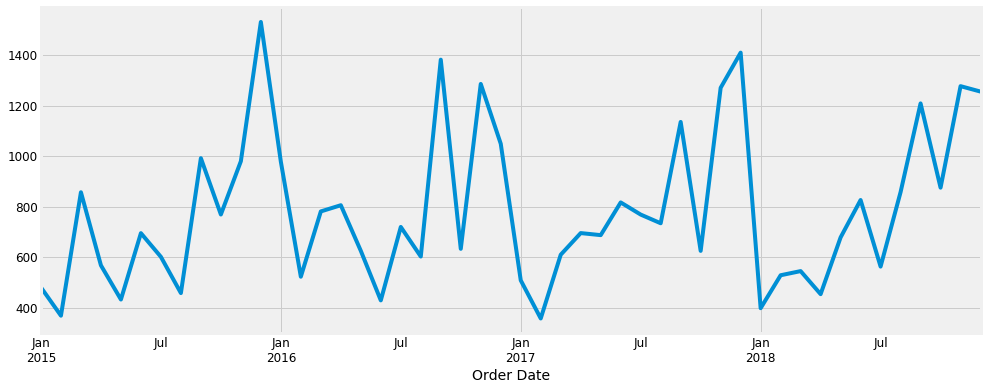

In [20]:
y.plot(figsize=(15, 6))
plt.show()

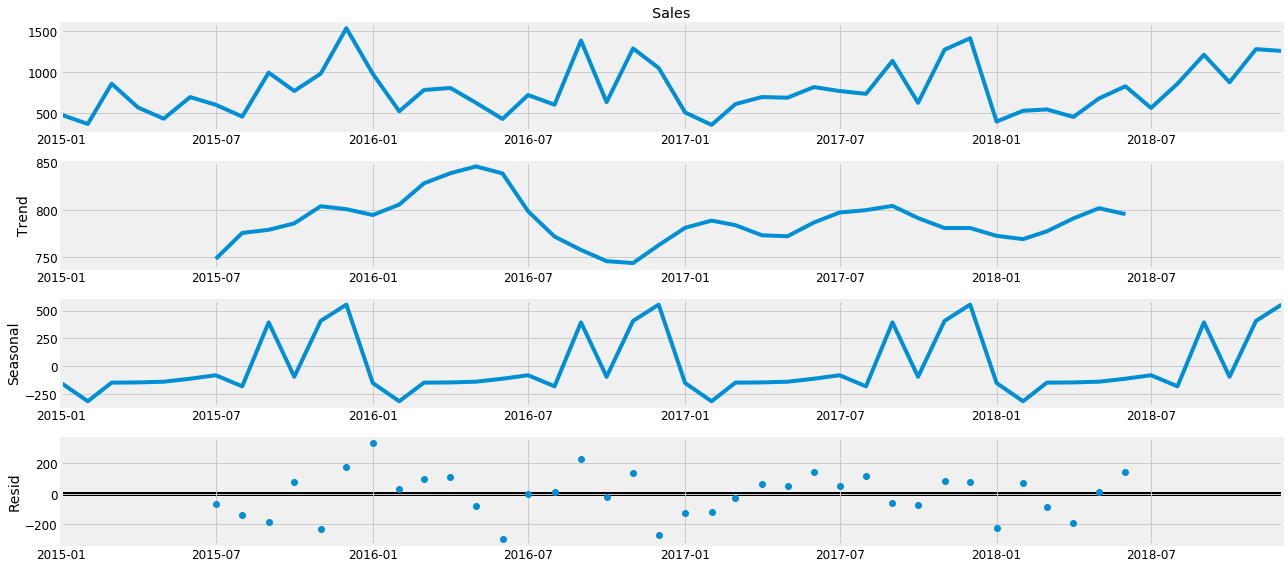

In [21]:
from pylab import rcParams

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [22]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [23]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205916


/Volumes/DATA/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1417.9102730307811
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130919702
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.27028997937816
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.23144334183377


/Volumes/DATA/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1326.7428348249452
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.24882803022405
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758108


/Volumes/DATA/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.56074298091374
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.6261389673285


/Volumes/DATA/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.57307479556164
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:24396.220495584315
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.98848769468657
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.8725576457883
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.894766843944


/Volumes/DATA/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1506.300187774073
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.63785672003183
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:304.967122816796
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.7889663004408


/Volumes/DATA/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1424.923989959169
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109211
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:306.91132001514575
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.9056176817033
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:3013.917845067602
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.87055484828966
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:279.5806233414432
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.1832977442624
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:3209.657493587164
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.75743684173335
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:281.5576621461239
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067713


/Volumes/DATA/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.46321478521355
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:304.2077675160923
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.9259367935209


/Volumes/DATA/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1429.3035832872893
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.46646750845827
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:304.5842692143879
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.7794442185784
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:22434.97311783149
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.368519581507
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:293.34221939659375
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.57633238772064


/Volumes/DATA/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.01560021170525
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:293.7513188122618
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541903
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1642.8365160987946
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.2003422281135
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:300.21306116190976
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.3403658785143
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1996.7270052438262
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.6270901345399
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:302.3264992508992
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:649.0318019835403
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:8933.654071755796
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:460.4762687609748
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:281.38730069394114
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:469.5250354660775
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2738.6773270198996
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:297.78754395462045
ARIMA(1, 1, 1)x(1

In [24]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


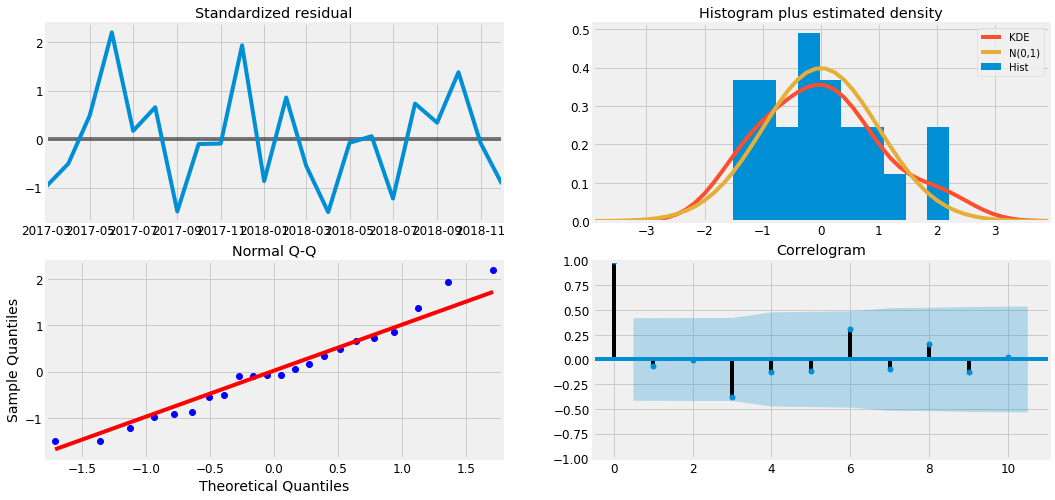

In [25]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

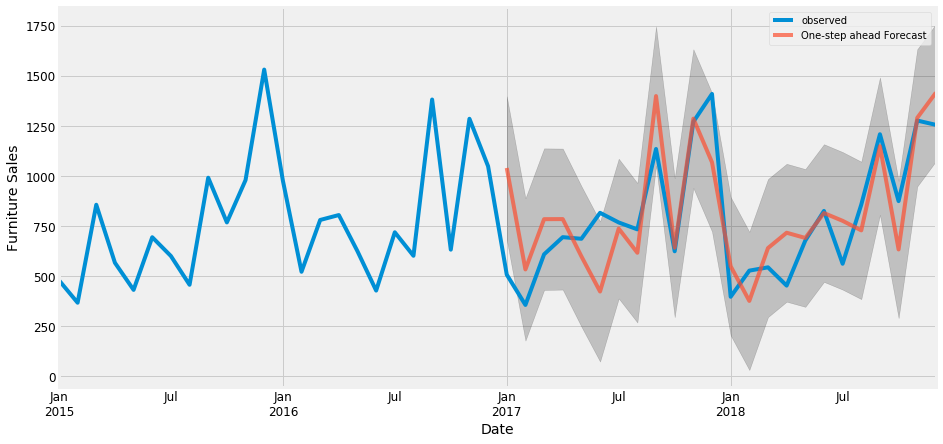

In [27]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [28]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 41414.5


In [29]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 203.51


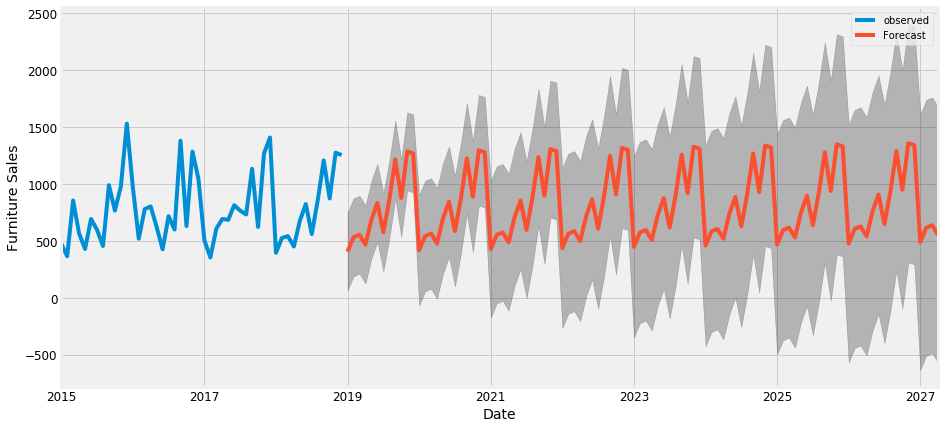

In [30]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [31]:
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
furniture.shape, office.shape

((2121, 21), (6026, 21))

In [32]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})
store = furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()

,Order Date,furniture_sales,office_sales
0,2015-01-01,480.194231,285.357647
1,2015-02-01,367.931600,63.042588
2,2015-03-01,857.291529,391.176318
3,2015-04-01,567.488357,464.794750
4,2015-05-01,432.049187,324.346545


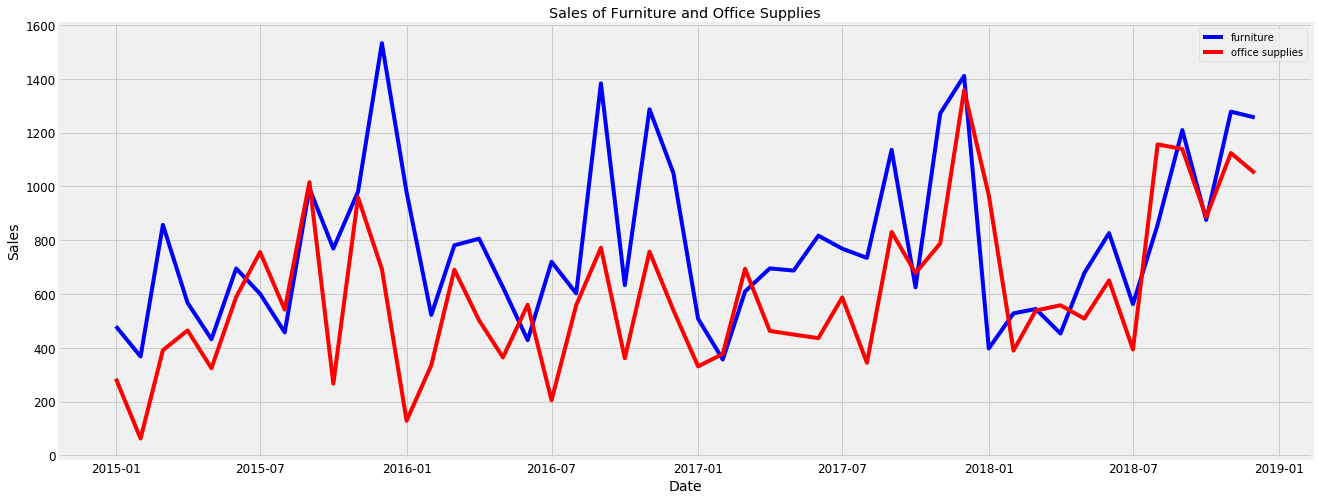

In [33]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture and Office Supplies')
plt.legend();

**_Office supplies first time produced higher sales than furniture is 2014–07–01_**.

It was July 2014!

# **Time Series Modeling with Prophet**

Released by Facebook in 2017, forecasting tool  [Prophet](https://research.fb.com/prophet-forecasting-at-scale/)  is designed for analyzing time-series that display patterns on different time scales such as yearly, weekly and daily. It also has advanced capabilities for modeling the effects of holidays on a time-series and implementing custom changepoints. Therefore, we are using Prophet to get a model up and running.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1296x432 with 0 Axes>

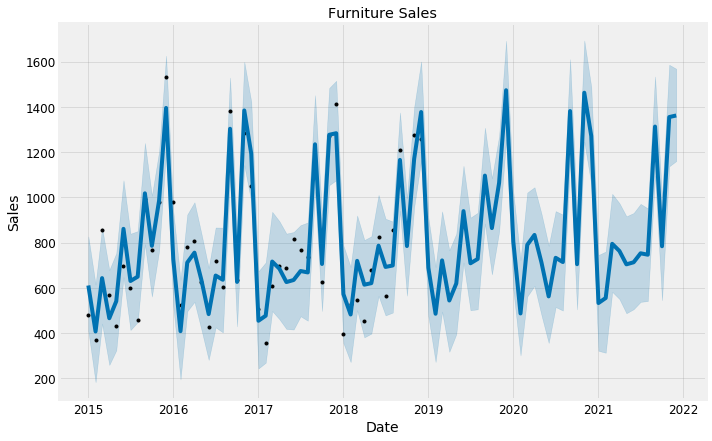

In [34]:
from fbprophet import Prophet
furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)
office = office.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
office_model = Prophet(interval_width=0.95)
office_model.fit(office)
furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)
office_forecast = office_model.make_future_dataframe(periods=36, freq='MS')
office_forecast = office_model.predict(office_forecast)
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales');

<Figure size 1296x432 with 0 Axes>

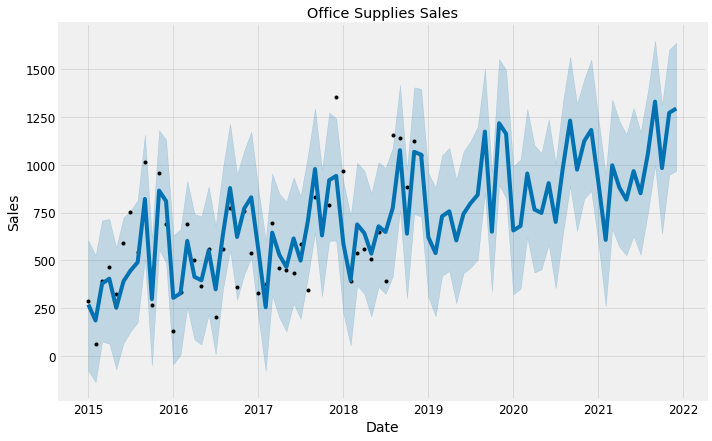

In [35]:
plt.figure(figsize=(18, 6))
office_model.plot(office_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Office Supplies Sales');

In [36]:
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
office_names = ['office_%s' % column for column in office_forecast.columns]
merge_furniture_forecast = furniture_forecast.copy()
merge_office_forecast = office_forecast.copy()
merge_furniture_forecast.columns = furniture_names
merge_office_forecast.columns = office_names
forecast = pd.merge(merge_furniture_forecast, merge_office_forecast, how = 'inner', left_on = 'furniture_ds', right_on = 'office_ds')
forecast = forecast.rename(columns={'furniture_ds': 'Date'}).drop('office_ds', axis=1)
forecast.head()

,Date,furniture_trend,furniture_yhat_lower,furniture_yhat_upper,furniture_trend_lower,furniture_trend_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_yearly,...,office_additive_terms,office_additive_terms_lower,office_additive_terms_upper,office_yearly,office_yearly_lower,office_yearly_upper,office_multiplicative_terms,office_multiplicative_terms_lower,office_multiplicative_terms_upper,office_yhat
0,2015-01-01,737.442884,408.559852,827.145127,737.442884,737.442884,-126.834378,-126.834378,-126.834378,-126.834378,...,-187.487797,-187.487797,-187.487797,-187.487797,-187.487797,-187.487797,0.0,0.0,0.0,269.137889
1,2015-02-01,739.106344,182.982623,615.157618,739.106344,739.106344,-331.842978,-331.842978,-331.842978,-331.842978,...,-278.220843,-278.220843,-278.220843,-278.220843,-278.220843,-278.220843,0.0,0.0,0.0,185.884543
2,2015-03-01,740.608824,442.229397,865.902537,740.608824,740.608824,-97.493813,-97.493813,-97.493813,-97.493813,...,-92.104978,-92.104978,-92.104978,-92.104978,-92.104978,-92.104978,0.0,0.0,0.0,378.756265
3,2015-04-01,742.272284,259.237369,678.728450,742.272284,742.272284,-276.534313,-276.534313,-276.534313,-276.534313,...,-73.556522,-73.556522,-73.556522,-73.556522,-73.556522,-73.556522,0.0,0.0,0.0,404.784421
4,2015-05-01,743.882084,323.976856,753.646449,743.882084,743.882084,-202.808153,-202.808153,-202.808153,-202.808153,...,-233.459025,-233.459025,-233.459025,-233.459025,-233.459025,-233.459025,0.0,0.0,0.0,252.120337


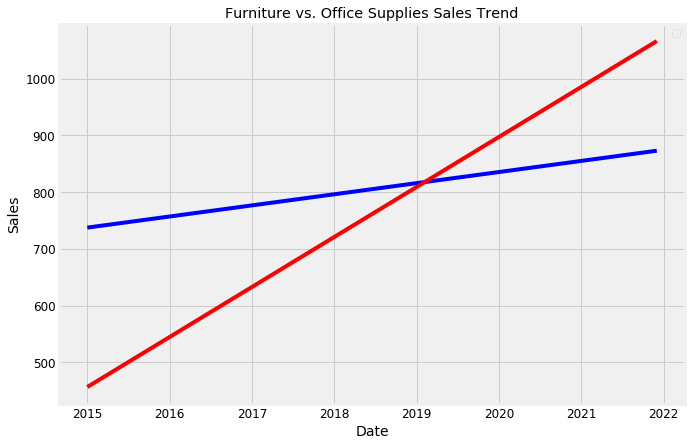

In [37]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_trend'], 'b-')
plt.plot(forecast['Date'], forecast['office_trend'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Sales Trend');

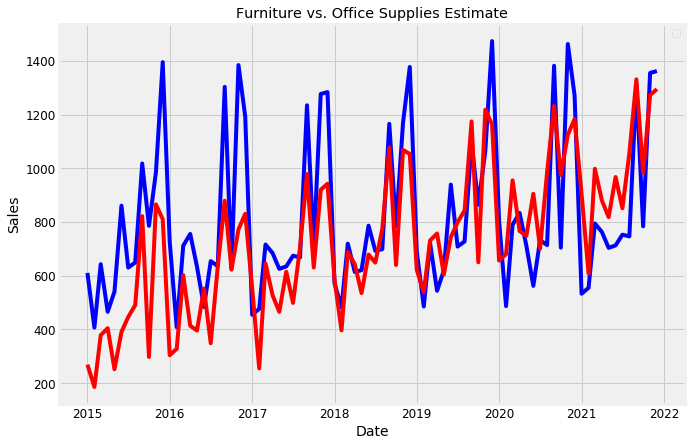

In [38]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['office_yhat'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Estimate');

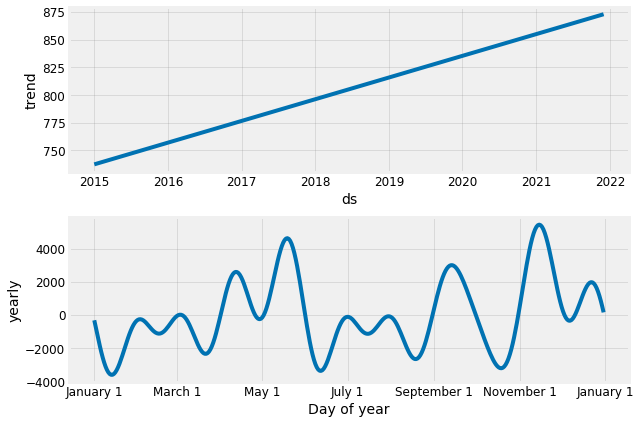

In [39]:
furniture_model.plot_components(furniture_forecast);


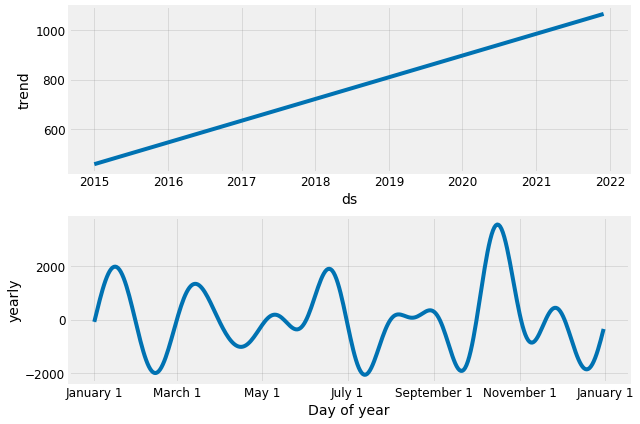

In [40]:
office_model.plot_components(office_forecast);
